##Questao3##
(M)Considere um sinal de mensagem composto por três senoides:
$$
f(t) = 2 cos(2𝜋 · 400t) + cos(2𝜋 · 800𝑡) − 3 sen(2𝜋 · 1200𝑡)
$$
isso dura 0,2 segundo.

**(a)** Usando uma frequência de amostragem de 4.000 Hz, apresente os seguintes gráficos: (i) sinal
𝑓 (𝑡), (ii) espectro do sinal 𝑓 (𝑡), (iii) sinal idealmente amostrado 𝑓 (𝑡) e o (iv) espectro do
sinal idealmente amostrado 𝑓 (𝑡).

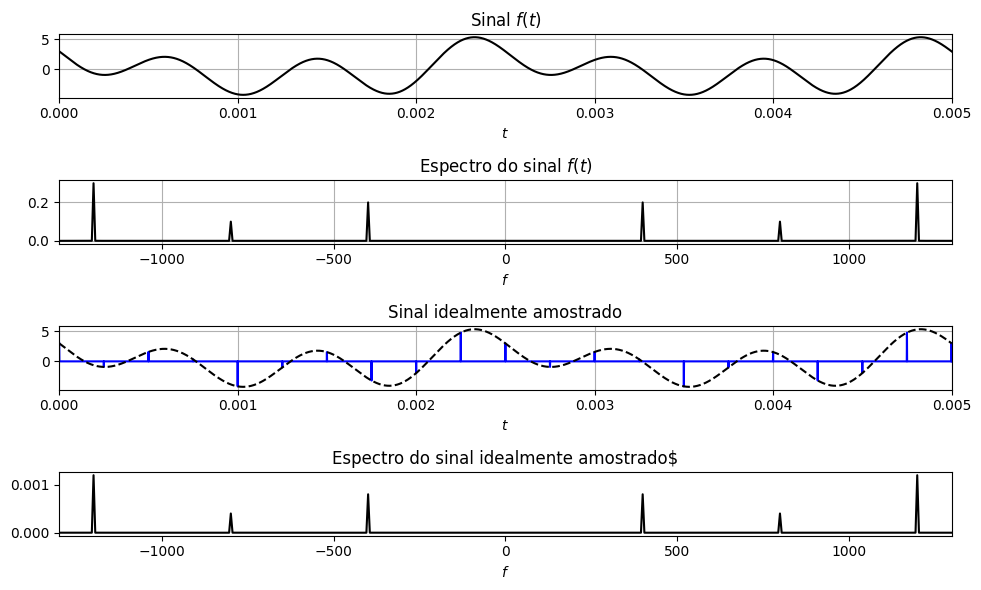

In [ ]:
import numpy as np                      #importando biblioteca numpy
import numpy.fft as fft                 #importando biblioteca numpy.fft
import scipy.signal as signal           #importando biblioteca scipy.signal
import matplotlib.pyplot as plt         #importando biblioteca matplotlib.pyplot

#Funcao para calcular a transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Fs = 4000            #frequência de amostragem
Td = 1e-6            #Passo exigido
t = np.arange(0,0.2,Td)

ft = 2*np.cos(2*np.pi*400*t) + np.cos(2*np.pi*800*t) - 3*np.sin(2*np.pi*1200*t)
f, xf = ctft(ft, Td)

Ts = 1/Fs
N = len(ft)
nFac = int(np.round(Ts/Td))
fT = np.zeros(N)
fT[0::nFac] = ft[0::nFac]
gf,FTf = ctft(fT,Td)

#(i) plot do sinal f(t)
plt.figure(figsize=(10,6))
plt.subplot(4,1,1)
plt.plot(t, ft, 'k')
plt.xlabel('$t$')
plt.title("Sinal $f(t)$")
plt.grid()
plt.xlim(0,0.005)


#(ii) espectro do sinal f(t)
plt.subplot(4,1,2)
plt.plot(f, np.abs(xf), 'k')
plt.xlabel('$f$')
plt.title("Espectro do sinal $f(t)$")
plt.grid()
plt.xlim(-1300, 1300)


#(iii) sinal idealmente amostrado
plt.subplot(4,1,3)
plt.plot(t, fT, 'b')
plt.xlim(0,0.005)
plt.xlabel('$t$')
plt.plot(t,ft, '--k')
plt.grid()
plt.title('Sinal idealmente amostrado')


#(iv) espectro do sinal idealmente amostrado
plt.subplot(4,1,4)
plt.plot(gf,abs(FTf),'k')
plt.xlim(-1300,1300)
plt.xlabel('$f$')
plt.title('Espectro do sinal idealmente amostrado$')

plt.tight_layout()
plt.show()

**(b)** Usando um filtro passa-baixas de frequência de corte 𝐵 = 2.000 Hz para reconstrução,
apresente os sinais: (i) sinal idealmente reconstruído e o (ii) sinal original.

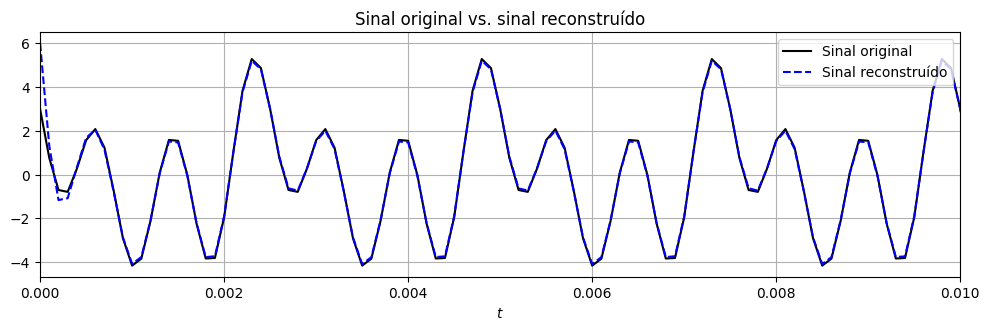

In [10]:
import numpy as np                      #importando biblioteca numpy
import numpy.fft as fft                 #importando biblioteca numpy.fft
import scipy.signal as signal           #importando biblioteca scipy.signal
import matplotlib.pyplot as plt         #importando biblioteca matplotlib.pyplot

#Funcao para calcular a transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

# Definindo sinal:
Fs = 4000            #frequência de amostragem
Td = 1e-4           #Passo
t = np.arange(0,0.2,Td)

ft = 2*np.cos(2*np.pi*400*t) + np.cos(2*np.pi*800*t) - 3*np.sin(2*np.pi*1200*t)
f, xf = ctft(ft, Td)

# Definindo sinal amostrado
Ts = 1/Fs
N = len(ft)
nFac = int(np.round(Ts/Td))
fT = np.zeros(N)
fT[0::nFac] = ft[0::nFac]
gf,FTf = ctft(fT,Td)

#Filtro Passa-Baixas
Fc = Fs/2                                                # frequência de corte
ordem = 3                                                # ordem do filtro
Fd = 1/Td
Wn =  Fc / (Fd/2)                                        # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass')   # coeficientes do filtro
g_rec_ideal = nFac*signal.filtfilt(b_lp, a_lp, fT)
fg,F_rec_ideal = ctft(g_rec_ideal,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k', label='Sinal original')
plt.plot(t,g_rec_ideal,'--b', label='Sinal reconstruído')
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.grid()
plt.xlim(0,0.01)
plt.legend(loc=1)

plt.tight_layout()
plt.show()

**(c)** Repita o item (b) supondo que utiliza-se um retentor de ordem zero em conjunto com um
filtro equalizador para reconstrução. Apresente o sinal reconstruído e o sinal original.

SQNR (PCM 16 níveis) =  22.791795323935133
SQNR (PCM 8 níveis) =  14.813383808082616
SQNR (PCM 4 níveis) =  11.176608166015924


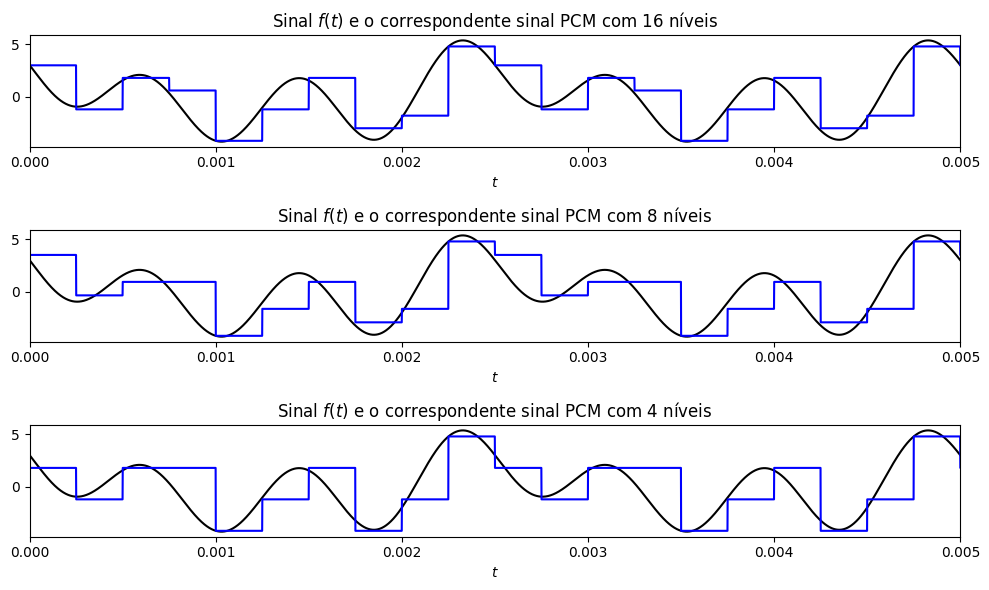

In [ ]:
import numpy as np                      #importando biblioteca numpy
import numpy.fft as fft                 #importando biblioteca numpy.fft
import scipy.signal as signal           #importando biblioteca scipy.signal
import matplotlib.pyplot as plt         #importando biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctff(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Funcao para fazer a quantizacao
def uniquan(x, L):
    x_max = max(x)
    x_min = min(x)
    q_level = np.linspace(x_min, x_max, L)
    a_p = (L-1)/(x_max - x_min)
    b_p = -a_p*x_min
    x_p = np.round((a_p*x + b_p)).astype(int)
    x_pcm = q_level[x_p]
    SQNR = 20*np.log10(np.linalg.norm(x)/np.linalg.norm(x - x_pcm))
    return x_pcm, SQNR

Td = 1e-6   #passo exigido
t = np.arange(0,0.2,Td)

#Retentor de Ordem Zero
Fs = 4000
Ts = 1/Fs
nFac = int(np.round(Ts/Td))
hZOH = np.zeros_like(t)
hZOH[0:nFac] = 1

ft = 2*np.cos(2*np.pi*400*t) + np.cos(2*np.pi*800*t) - 3*np.sin(2*np.pi*1200*t)
f,Gf = ctft(ft,Td)

fT = np.zeros_like(ft)
fT[0::nFac] = ft[0::nFac]

f_zoh_temp = np.convolve(fT,hZOH)
Nconv = int(len(f_zoh_temp)/2) + 1
f_zoh = np.zeros(Nconv)
f_zoh = f_zoh_temp[0:Nconv]

[f_pcm_16, SQNR16] = uniquan(f_zoh, 16)
[f_pcm_8, SQNR8]  = uniquan(f_zoh, 8)
[f_pcm_4, SQNR4]  = uniquan(f_zoh, 4)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $f(t)$ e o correspondente sinal PCM com 16 níveis')
plt.plot(t,f_pcm_16,'-b')
plt.xlim(0,0.005)

plt.subplot(3,1,2)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $f(t)$ e o correspondente sinal PCM com 8 níveis')
plt.plot(t,f_pcm_8,'-b')
plt.xlim(0,0.005)

plt.subplot(3,1,3)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $f(t)$ e o correspondente sinal PCM com 4 níveis')
plt.plot(t,f_pcm_4,'-b')
plt.xlim(0,0.005)

plt.tight_layout()

print('SQNR (PCM 16 níveis) = ', SQNR16)
print('SQNR (PCM 8 níveis) = ', SQNR8)
print('SQNR (PCM 4 níveis) = ', SQNR4)

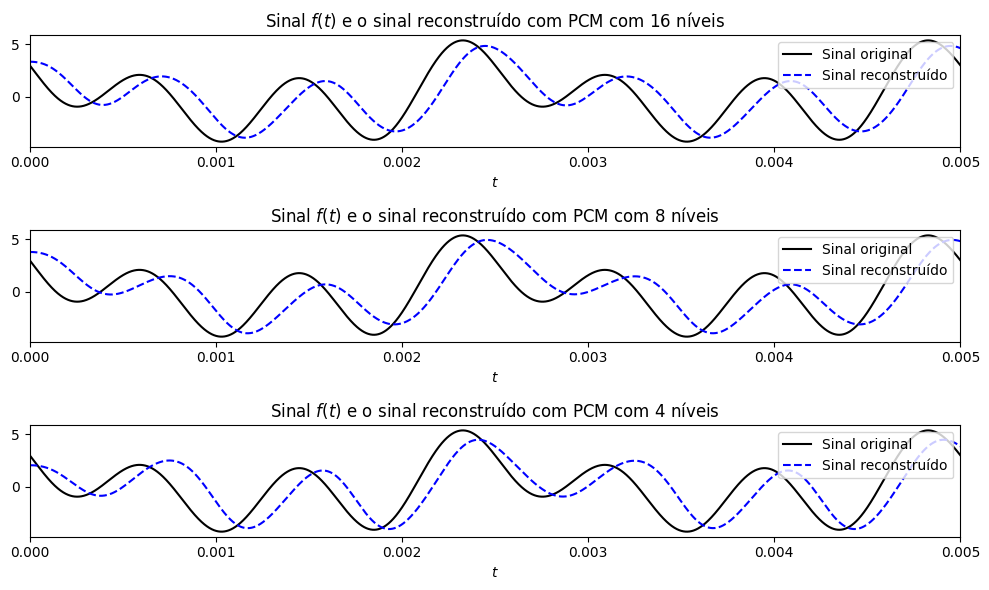

In [ ]:
#Filtro Passa-Baixa
W = Fs/2                                                # frequência de corte
ordem = 4                                               # ordem do filtro
Fd = 1/Td
fc_norm = W / (Fd/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, fc_norm, btype='lowpass')   # coeficientes do filtro

f_rec_pcm_16 = signal.filtfilt(b_lp, a_lp, f_pcm_16)
f_rec_pcm_8 = signal.filtfilt(b_lp, a_lp, f_pcm_8)
f_rec_pcm_4 = signal.filtfilt(b_lp, a_lp, f_pcm_4)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,ft,'k', label='Sinal original')
plt.xlabel('$t$')
plt.title('Sinal $f(t)$ e o sinal reconstruído com PCM com 16 níveis')
plt.plot(t,f_rec_pcm_16,'--b', label='Sinal reconstruído')
plt.xlim(0,0.005)
plt.legend(loc=1)

plt.subplot(3,1,2)
plt.plot(t,ft,'k', label='Sinal original')
plt.xlabel('$t$')
plt.title('Sinal $f(t)$ e o sinal reconstruído com PCM com 8 níveis')
plt.plot(t,f_rec_pcm_8,'--b', label='Sinal reconstruído')
plt.xlim(0,0.005)
plt.legend(loc=1)

plt.subplot(3,1,3)
plt.plot(t,ft,'k', label='Sinal original')
plt.xlabel('$t$')
plt.title('Sinal $f(t)$ e o sinal reconstruído com PCM com 4 níveis')
plt.plot(t,f_rec_pcm_4,'--b', label='Sinal reconstruído')
plt.xlim(0,0.005)
plt.legend(loc=1)

plt.tight_layout()

**(d)** Um dos pulsos realizáveis para realizar a amostragem é o pulso Gaussiano. Sendo,

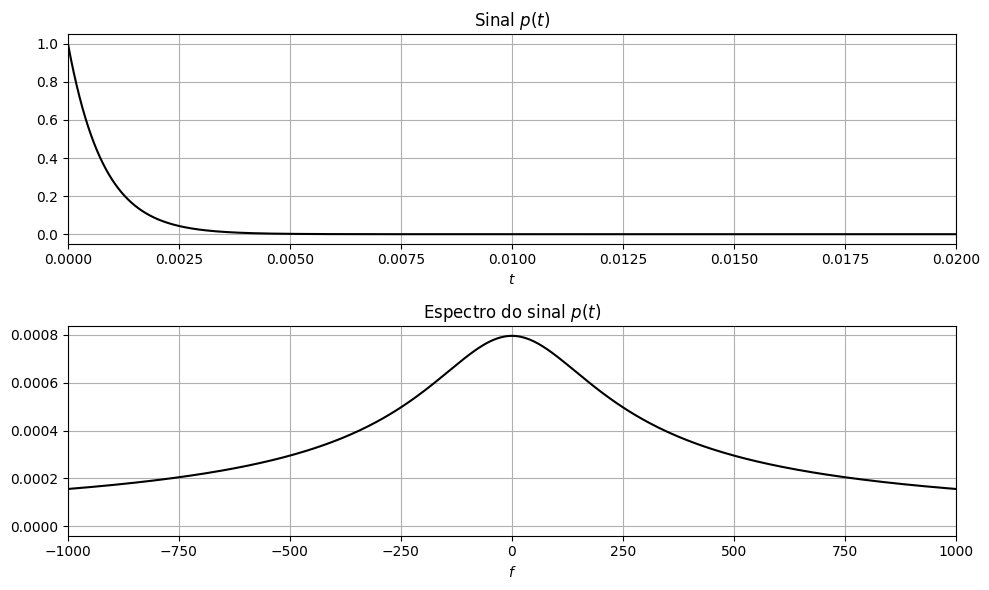

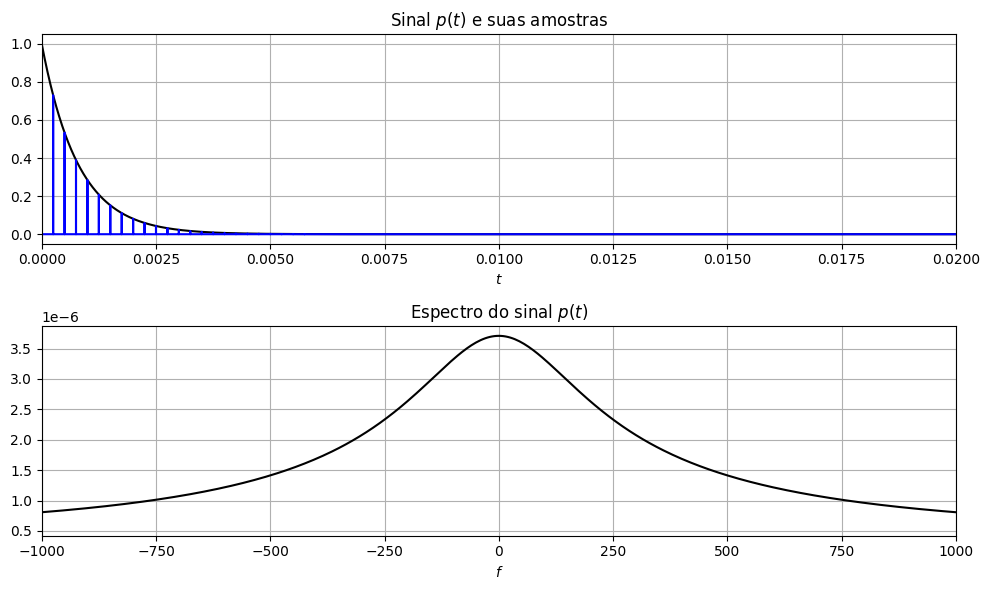

In [ ]:
import numpy as np                      #importando biblioteca numpy
import numpy.fft as fft                 #importando biblioteca numpy.fft
import scipy.signal as signal           #importando biblioteca scipy.signal
import matplotlib.pyplot as plt         #importando biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-6
t = np.arange(0,0.2,Td)
ta = 0.01
ft = np.exp((-np.pi*t*2)/ta*2)

f1,FT = ctft(ft,Td)

Fs = 4000
Ts = 1/Fs
N = len(ft)
nFac = int(np.round(Ts/Td))
fT = np.zeros(N)
fT[0::nFac] = ft[0::nFac]
f,FTf = ctft(fT,Td)

# (i)sinal p(t)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $p(t)$')
plt.xlim(min(t),0.02)
plt.grid()

# (ii) Espectro do sinal p(t)
plt.subplot(2,1,2)
plt.plot(f1,np.abs(FT),'k')
plt.xlabel('$f$')
plt.title('Espectro do sinal $p(t)$')
plt.xlim(-1000,1000)
plt.grid()

plt.tight_layout()

# (iii) Sinal amostrado prático p(t)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $p(t)$ e suas amostras')
plt.plot(t,fT,'b')
plt.xlim(min(t),0.02)
plt.grid()

# (iv) Espectro do sinal amostrado p(t)
plt.subplot(2,1,2)
plt.plot(f,np.abs(FTf),'k')
plt.xlabel('$f$')
plt.title('Espectro do sinal $p(t)$')
plt.xlim(-1000,1000)
plt.grid()

plt.tight_layout()
plt.show()

**(e)** Modifique o valor 𝜏 do pulso Gaussiano do item (d) para 𝜏 = 0,02 s e 𝜏 = 0,005 s. Comente
os resultados encontrados no espectro do sinal amostrado.

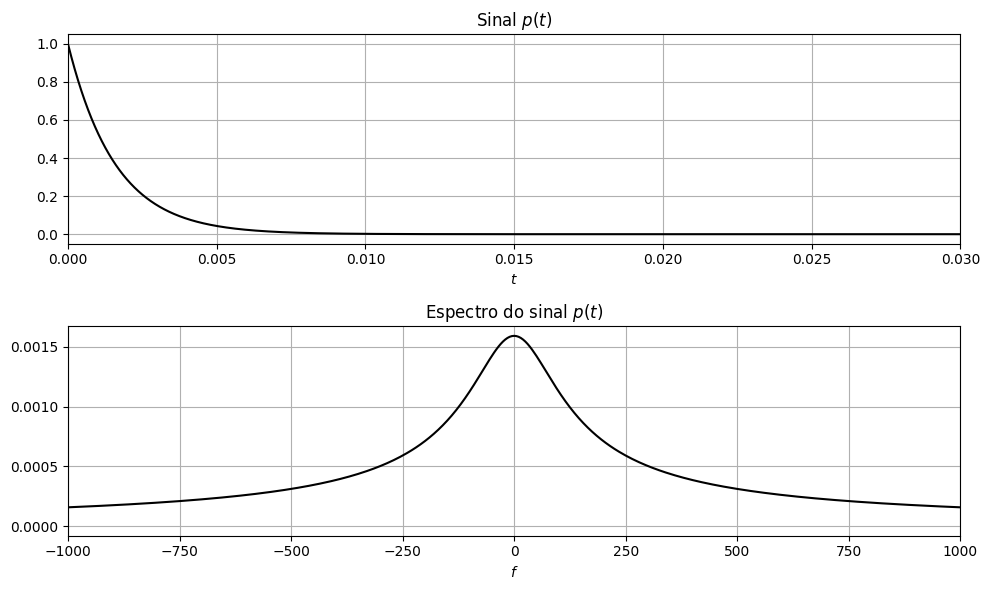

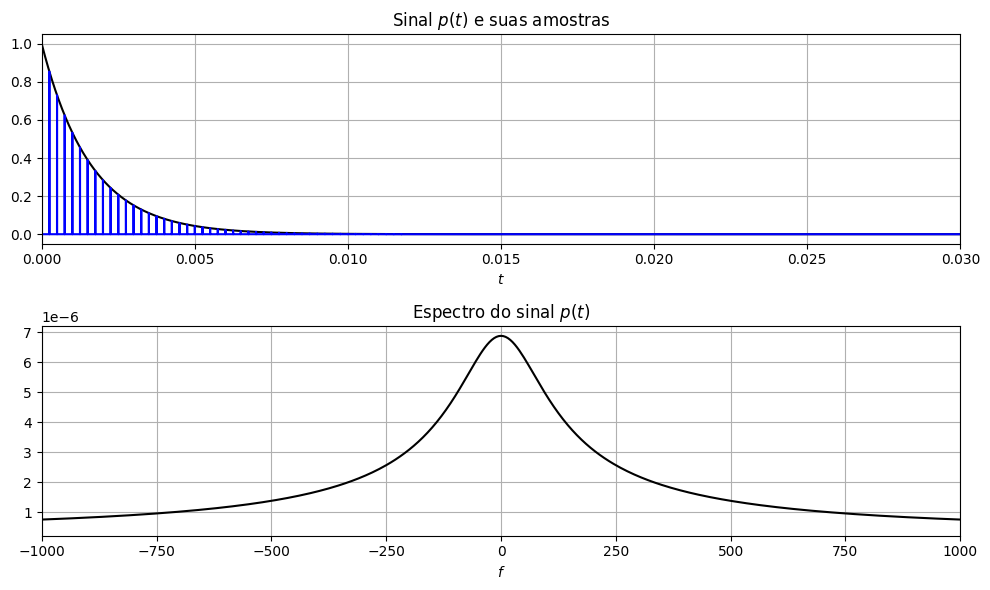

In [ ]:
# Para ta = 0.02

import numpy as np                      #importando biblioteca numpy
import numpy.fft as fft                 #importando biblioteca numpy.fft
import scipy.signal as signal           #importando biblioteca scipy.signal
import matplotlib.pyplot as plt         #importando biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-6
t = np.arange(0,0.2,Td)
ta = 0.02
ft = np.exp((-np.pi*t*2)/ta*2)

f1,FT = ctft(ft,Td)

Fs = 4000
Ts = 1/Fs
N = len(ft)
nFac = int(np.round(Ts/Td))
fT = np.zeros(N)
fT[0::nFac] = ft[0::nFac]
f,FTf = ctft(fT,Td)

# (i)sinal p(t)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $p(t)$')
plt.xlim(min(t),0.03)
plt.grid()

# (ii) Espectro do sinal p(t)
plt.subplot(2,1,2)
plt.plot(f1,np.abs(FT),'k')
plt.xlabel('$f$')
plt.title('Espectro do sinal $p(t)$')
plt.xlim(-1000,1000)
plt.grid()

plt.tight_layout()

# (iii) Sinal amostrado prático p(t)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $p(t)$ e suas amostras')
plt.plot(t,fT,'b')
plt.xlim(min(t),0.03)
plt.grid()

# (iv) Espectro do sinal amostrado p(t)
plt.subplot(2,1,2)
plt.plot(f,np.abs(FTf),'k')
plt.xlabel('$f$')
plt.title('Espectro do sinal $p(t)$')
plt.xlim(-1000,1000)
plt.grid()

plt.tight_layout()
plt.show()

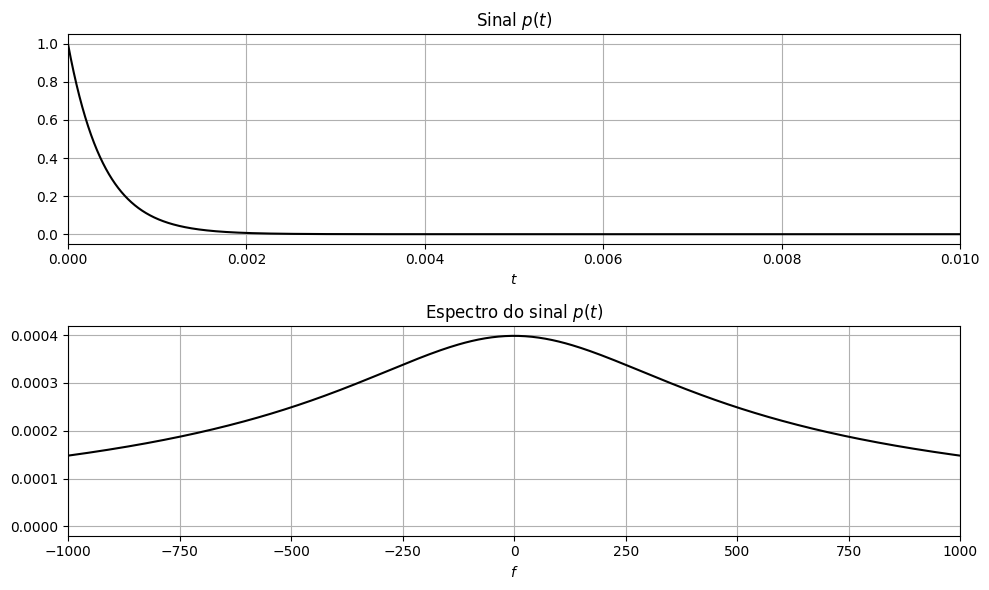

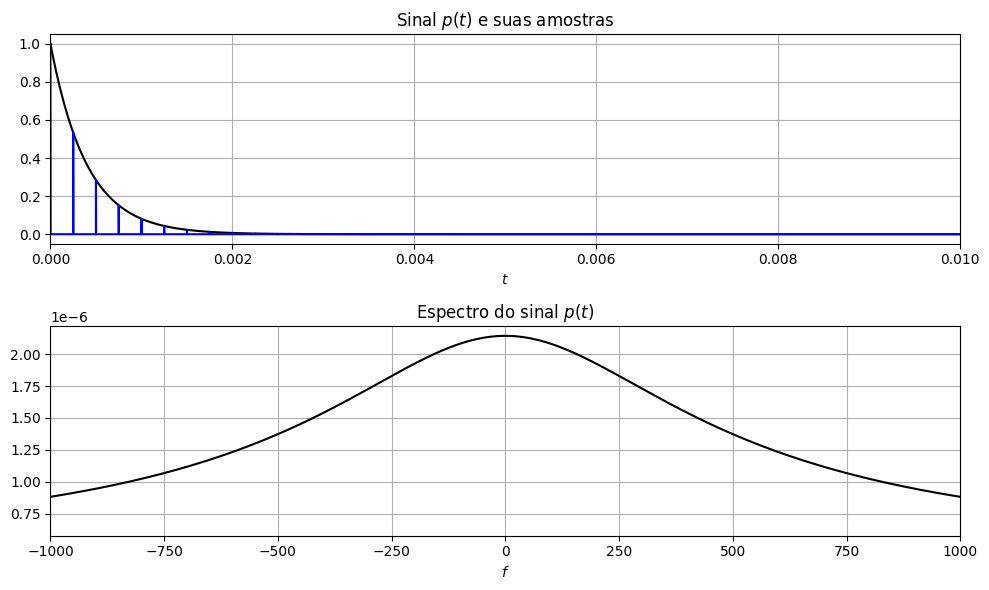

In [ ]:
# Para ta = 0.005

import numpy as np                      #importando biblioteca numpy
import numpy.fft as fft                 #importando biblioteca numpy.fft
import scipy.signal as signal           #importando biblioteca scipy.signal
import matplotlib.pyplot as plt         #importando biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-6       #passo exigido
t = np.arange(0,0.2,Td)
ta = 0.005
ft = np.exp((-np.pi*t*2)/ta*2)

f1,FT = ctft(ft,Td)

Fs = 4000
Ts = 1/Fs
N = len(ft)
nFac = int(np.round(Ts/Td))
fT = np.zeros(N)
fT[0::nFac] = ft[0::nFac]
f,FTf = ctft(fT,Td)

# (i)sinal p(t)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $p(t)$')
plt.xlim(min(t),0.01)
plt.grid()

# (ii) Espectro do sinal p(t)
plt.subplot(2,1,2)
plt.plot(f1,np.abs(FT),'k')
plt.xlabel('$f$')
plt.title('Espectro do sinal $p(t)$')
plt.xlim(-1000,1000)
plt.grid()

plt.tight_layout()

# (iii) Sinal amostrado prático p(t)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,ft,'k')
plt.xlabel('$t$')
plt.title('Sinal $p(t)$ e suas amostras')
plt.plot(t,fT,'b')
plt.xlim(min(t),0.01)
plt.grid()

# (iv) Espectro do sinal amostrado p(t)
plt.subplot(2,1,2)
plt.plot(f,np.abs(FTf),'k')
plt.xlabel('$f$')
plt.title('Espectro do sinal $p(t)$')
plt.xlim(-1000,1000)
plt.grid()

plt.tight_layout()
plt.show()

# Questão 9
**(b)(M)** Escreva um algoritmo computacional para determinar a saída 𝑦[𝑛] para 0 ≤ 𝑛 ≤ 10 de
forma recursiva para os sistemas do item (a). Compare seus resultados com àqueles obtidos
de forma analítica.

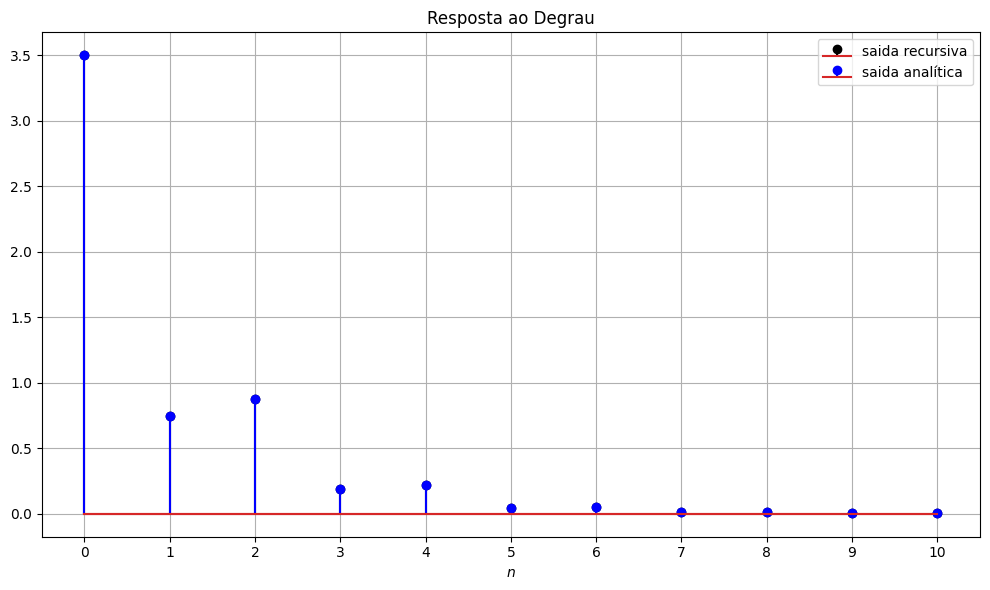

In [1]:
# (i)

import numpy as np
import matplotlib.pyplot as plt

Nmax = 10
n = np.arange(0,Nmax+1)
u = 1*(n>=0)

y = ((-1/2)**n + 5/2*((1/2)**n))*u
yn1 = 3

yn = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    fn = ((-1/2)**index)*u[index]
    yn[index] = 2*fn + (1/2)*yn1
    yn1 = yn[index]


# plotagem do gráfico
plt.figure(figsize=(10,6))
default_x_ticks = range(Nmax+1)

plt.xticks(default_x_ticks, n)
plt.stem(n, yn, 'k', label='saida recursiva')
plt.stem(n, y, 'b', label='saida analítica')
plt.xlabel('$n$')
plt.title('Resposta ao Degrau')
plt.grid()
plt.legend(loc=1)

plt.tight_layout()
plt.show()

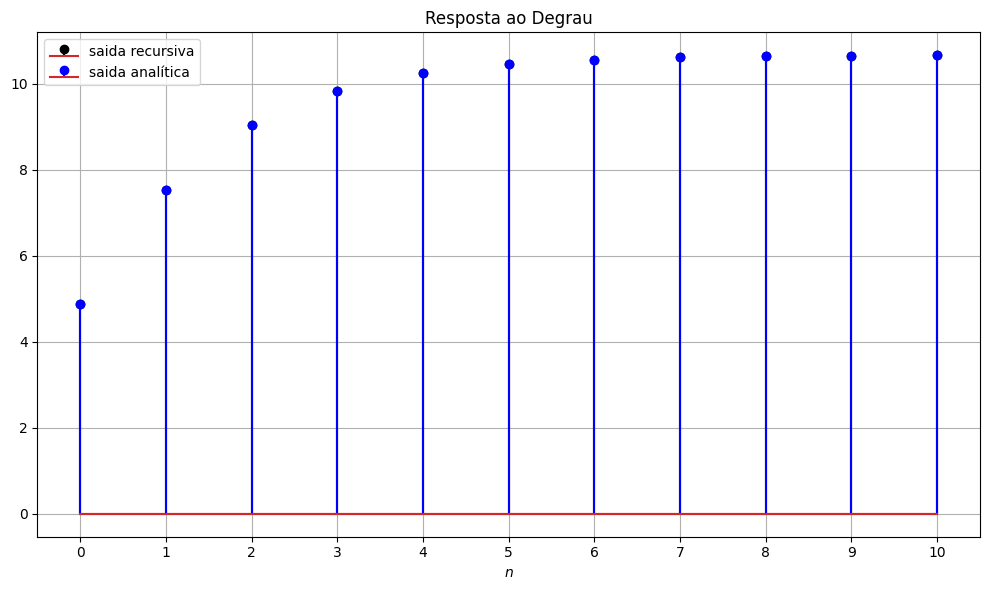

In [2]:
# (ii)

import numpy as np
import matplotlib.pyplot as plt

Nmax = 10
n = np.arange(0,Nmax+1)
u = 1*(n>=0)

y = ((32/3) - (27/4)*(1/2)**n + (23/24)*((1/4)**n))*u
yn1 = 1
yn2 = -1

yn = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    fn = 2*u[index]
    yn[index] = 2*fn + (3/4)*yn1 - (1/8)*yn2
    yn2 = yn1
    yn1 = yn[index]

plt.figure(figsize=(10,6))
default_x_ticks = range(Nmax+1)

plt.xticks(default_x_ticks, n)
plt.stem(n, yn, 'k', label='saida recursiva')
plt.stem(n, y, 'b', label='saida analítica')
plt.xlabel('$n$')
plt.title('Resposta ao Degrau')
plt.grid()
plt.legend(loc=0)

plt.tight_layout()
plt.show()

# Questão10

**(d)(M)** Escreva um algoritmo computacional para determinar a resposta ao impulso ℎ[𝑛] para
0 ≤ 𝑛 ≤ 10 de forma recursiva para os sistema. Analisando sua resposta, verifique se o
sistema é estável.

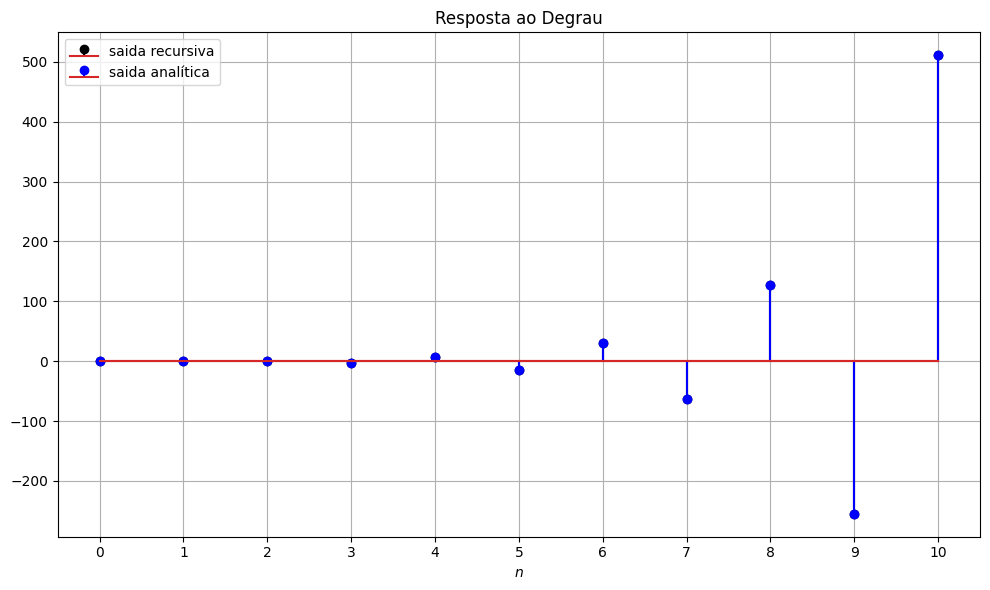

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Nmax = 10
n = np.arange(0,Nmax+1)
d = 1*(n==0)

h = ((-1)**(n+1) + (1/2)*((-2)**n))*u

f_n1 = 0
f_n2 = 0
h_n1 = 0
h_n2 = 0

h_n = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    f_n = d[index]
    h_n[index] = f_n + 3*f_n1 + 3*f_n2 - 3*h_n1 - 2*h_n2
    f_n2 = f_n1
    f_n1 = f_n
    h_n2 = h_n1
    h_n1 = h_n[index]

plt.figure(figsize=(10,6))
default_x_ticks = range(Nmax+1)

plt.xticks(default_x_ticks, n)
plt.stem(n, h_n, 'k', label='saida recursiva')
plt.stem(n, h, 'b', label='saida analítica')
plt.xlabel('$n$')
plt.title('Resposta ao Degrau')
plt.grid()
plt.legend(loc=0)

plt.tight_layout()
plt.show()

Questão11
**(d)(M)** Escreva um algoritmo computacional para determinar de forma recursiva a saída do
sistema 𝑦[𝑛] para 0 ≤ 𝑛 ≤ 10 quando a entrada é 𝑓 [𝑛] = 𝑒𝑛+1𝑢[𝑛]. Compare o resultado
com àquele encontrado no item anterior.

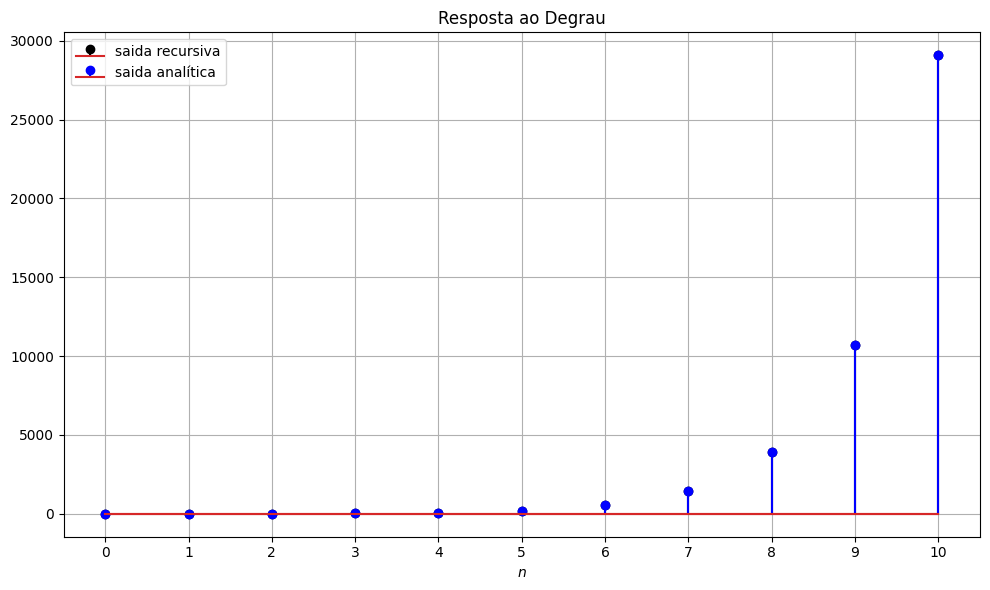

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Nmax = 10
n = np.arange(0,Nmax+1)
u = 1*(n>=0)
y = (1.32*np.exp(n) - 0.86*(-0.2)**n - 1.13*(0.8)**n)*u

fn1 = 0
yn1 = 0
yn2 = 0

yn = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    fn = (np.exp(index+1))*u[index]
    yn[index] = fn1 + 0.6*yn1 + 0.16*yn2
    fn1 = fn
    yn2 = yn1
    yn1 = yn[index]

plt.figure(figsize=(10,6))
default_x_ticks = range(Nmax+1)

plt.xticks(default_x_ticks, n)
plt.stem(n, yn, 'k', label='saida recursiva')
plt.stem(n, y, 'b', label='saida analítica')
plt.xlabel('$n$')
plt.title('Resposta ao Degrau')
plt.grid()
plt.legend(loc=0)

plt.tight_layout()
plt.show()

# Questão12

**(c)(M)** Escreva um algoritmo computacional para determinar de forma recursiva a resposta ao
impulso do sistema para 0 ≤ 𝑛 ≤ 10. Utilize duas abordagens:

**(i)** Primeiramente, vá resolvendo recursivamente cada uma das três equações dadas. Ou
seja, resolva primeiro a equação para 𝑤[𝑛], após isso, resolva a equação para 𝑣[𝑛] e por
fim, a equação para 𝑦[𝑛].

**(ii)** Após isso, resolva recursivamente utilizando a única equação diferenças que relaciona a
entrada 𝑓 [𝑛] com a saída 𝑦[𝑛], obtida no item anterior.
Compare os resultados obtidos.

In [ ]:
#para (i)
import numpy as np
import matplotlib.pyplot as plt

#parametros para plotagem
Nmax = 10
n = np.arange(0,Nmax+1)
d = 1*(n==0)

#fazendo a recursão de w[n]
wn = 0
fn = 0
fn1 = 0

wn = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    fn = d[index]
    wn[index] = (1/2)*fn + 2*fn1
    fn1 = fn

#fazendo a recursão de v[n]
vn = 0
vn1 = 0
wn1 = 0

vn = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    vn[index] = (1/3)*vn1 + wn1
    wn1 = wn[index]
    vn1 = vn[index]

#fazendo a recursão de v[n]
yn = 0
yn1 = 0
vn1 = 0

yn = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    yn[index] = (1/2)*yn1 + 2*vn[index] + vn1
    yn1 = yn[index]
    vn1 = vn[index]

# plotagem do gráfico
plt.figure(figsize=(10,5))
default_x_ticks = range(Nmax+1)

plt.xticks(default_x_ticks, n)
plt.stem(n, yn, 'k', label='saida recursiva')
plt.xlabel('$n$')
plt.title('Resposta ao Impulso')
plt.grid()
plt.legend(loc=1)

plt.tight_layout()
plt.show()

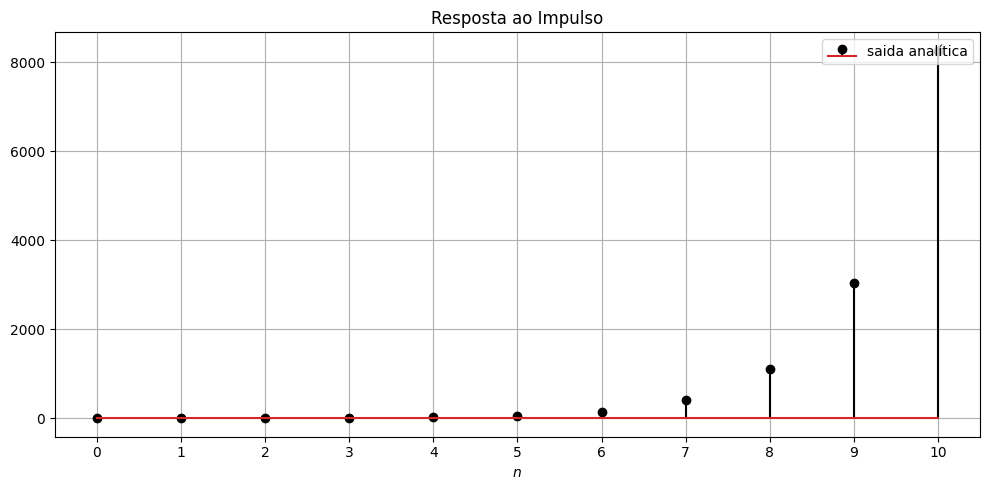

In [5]:
#para (ii)

import numpy as np
import matplotlib.pyplot as plt


Nmax = 10
n = np.arange(0,Nmax+1)
d = 1*(n==0)


fn = 0
fn1 = 0
fn2 = 0
fn3 = 0
y = 0
yn1 = 0
yn2 = 0

y = np.zeros(Nmax+1)
for index in np.arange(0,Nmax+1):
    fn = d[index]
    y[index] = fn1 + (9/2)*fn2 + 2*fn3 + (5/6)*yn1 - (1/6)*yn2
    fn3 = fn2
    fn2 = fn1
    fn1 = fn
    yn2 = yn1
    yn1 = yn[index]

plt.figure(figsize=(10,5))

default_x_ticks = range(Nmax+1)

plt.xticks(default_x_ticks, n)
plt.stem(n, y, 'k', label='saida analítica')
plt.xlabel('$n$')
plt.title('Resposta ao Impulso')
plt.grid()
plt.legend(loc=1)

plt.tight_layout()
plt.show()